In [10]:

import numpy as np
import csv
import os

import matplotlib.pyplot as plt

# Import data

def main():
    filenames_path = "./data"
    filenames = [os.path.join(filenames_path, filename) for filename in os.listdir(filenames_path) if filename.endswith(".csv")]

    rows = [row for filename in filenames for row in file_rows(filename)]

    durations = [int(row[0]) for row in rows]
    start_times = [parse_timestr(row[1]) for row in rows]
    end_times = [parse_timestr(row[2]) for row in rows]
    #count_multiday_trips(start_times, end_times)
    # In fact, many people check out bikes late at night one day
    # and bike until the next day begins

    start_stations = [int(row[3]) for row in rows]
    end_stations = [int(row[5]) for row in rows]
    # note that stations get added to the program over time
    # columns 4,6 contain text representation of the numbers in columns 3,5

    bike_numbers = [bike_num(row[7]) for row in rows]
    # Some are None, the data is messy
    #assert_bike_numbers(bike_numbers)

    # Every membertype is "member"
    #member_types = [row[8] for row in rows]
    #assert_member_types(member_types)
    
    return start_times



def bike_num(s):
    if s[0] == "W" or s[0] == "w":
        return int(s[1:])
    return None

def count_multiday_trips(start_times, end_times):
    num = 0
    for a,b in zip(start_times, end_times):
        if a[0] != b[0]:
            num += 1
    print("The proportion of trips which are multiday is", num/len(start_times))

def assert_member_types(member_types):
    for type in member_types:
        assert type == "Member"

def assert_bike_numbers(bike_numbers):
    for number in bike_numbers:
        assert int(str(number)) == number

# Returns 2: date (str), time as # absolute seconds since midnight (int)
def parse_timestr(instr):
    instrs = instr.split(' ')
    # datestr, timestr
    h, m, s = instrs[1].split(':')
    return instrs[0], int(h) * 3600 + int(m) * 60 + int(s)

def file_rows(filename):
    with open(filename) as csvfile:
        rows = [row for row in csv.reader(csvfile)]
    # keys = rows[0]
    print(rows[0:5])
    return rows[1:]






In [15]:
from copy import deepcopy

def plot_day_ranges(start_times):
    day_ranges = []
    
    daystr = ""
    day_range = []
    for (i, time) in enumerate(start_times):
        if daystr != time[0]:
            daystr = time[0]
            day_ranges.append(deepcopy(day_range))
            day_range = []
        day_range.append(i)
    
    ndays = len(day_ranges)
    day_range_lens = [len(dr) for dr in day_ranges]
    print(len(day_ranges), sum(day_range_lens)/ndays )
    #scipy.stats.linregress()
    
    # https://matplotlib.org/gallery/statistics/hist.html
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

    # We can set the number of bins with the `bins` kwarg
    axs[0].hist(day_range_lens, bins=ndays)
    axs[1].hist(day_range_lens, bins=ndays)


In [12]:
start_times = main()


[['Duration', 'Start date', 'End date', 'Start station number', 'Start station', 'End station number', 'End station', 'Bike number', 'Member type'], ['1012', '2010-09-20 11:27:04', '2010-09-20 11:43:56', '31208', 'M St & New Jersey Ave SE', '31108', '4th & M St SW', 'W00742', 'Member'], ['61', '2010-09-20 11:41:22', '2010-09-20 11:42:23', '31209', '1st & N St  SE', '31209', '1st & N St  SE', 'W00032', 'Member'], ['2690', '2010-09-20 12:05:37', '2010-09-20 12:50:27', '31600', '5th & K St NW', '31100', '19th St & Pennsylvania Ave NW', 'W00993', 'Member'], ['1406', '2010-09-20 12:06:05', '2010-09-20 12:29:32', '31600', '5th & K St NW', '31602', 'Park Rd & Holmead Pl NW', 'W00344', 'Member']]
[['Duration', 'Start date', 'End date', 'Start station number', 'Start station', 'End station number', 'End station', 'Bike number', 'Member type'], ['3548', '2011-01-01 00:01:29', '2011-01-01 01:00:37', '31620', '5th & F St NW', '31620', '5th & F St NW', 'W00247', 'Member'], ['346', '2011-01-01 00:02

468 2863.0491452991455


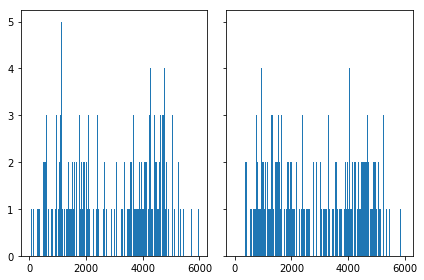

In [16]:
plot_day_ranges(start_times)


In [14]:
print(len(start_times))

1342364
